# Vector Chirped Z-transform (VCZT)


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffractio import degrees, um
from diffractio import np

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY


In [3]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 256)

focal = 16 * um
wavelength = 0.6328 * um

In [4]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0 * um, 0 * um),
    w0=(32 * um, 32 * um),
    z0=0 * um,
    A=1,
    theta=0 * degrees,
    phi=0 * degrees,
)
# u0.plane_wave()

In [5]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens_cylindrical(x0=0, focal=focal, angle=90 * degrees)
t.lens(r0=(0.0, 0.0), focal=focal)

In [6]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))
EM1.pupil()

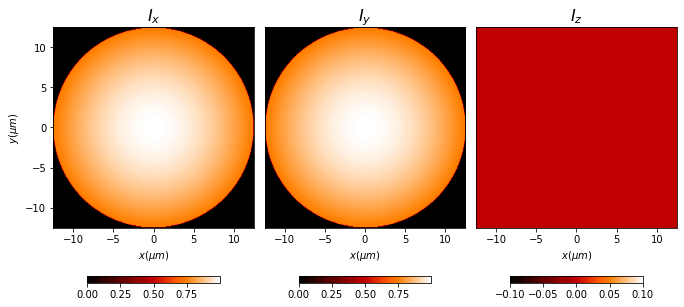

In [7]:
EM1.draw("intensities", logarithm=0)

## to value


In [8]:
x_out = 0.0
y_out = 0.0
z = focal

In [ ]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((-2.9142445706507045-12.016921496269976j), (12.016921496269976-2.9142445706507045j), (-4.39648317751562e-14-7.771561172376096e-15j))
CPU times: user 185 ms, sys: 65.8 ms, total: 251 ms
Wall time: 259 ms


## to x_field


In [10]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.0
z = focal

CPU times: user 842 ms, sys: 247 ms, total: 1.09 s
Wall time: 755 ms


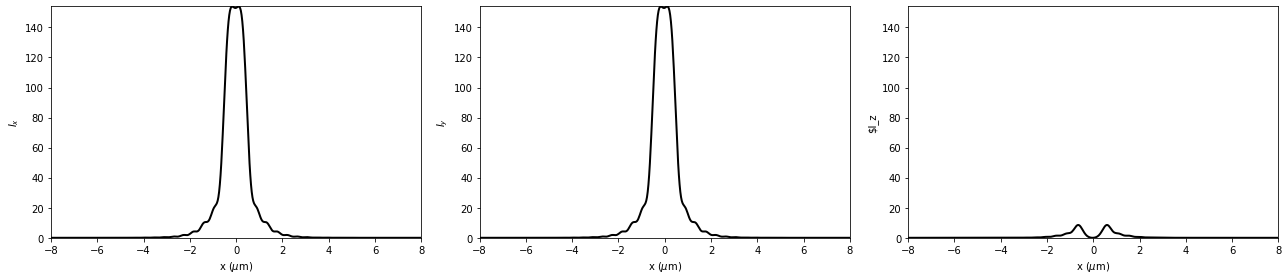

In [11]:
%%time
EM2_1D=EM1.VCZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [12]:
x_out = 0.0
y_out = 0.0
z = np.linspace(focal - 10 * um, focal + 4 * um, 64)

In [13]:
%%time
EM2=EM1.VCZT(z, x_out, y_out, verbose=False);


CPU times: user 14.6 s, sys: 3.54 s, total: 18.2 s
Wall time: 21.1 s


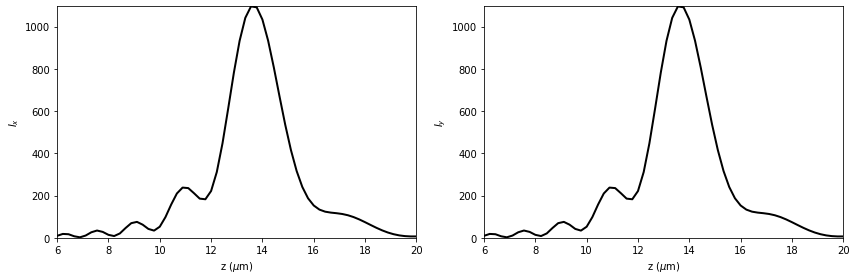

In [14]:
EM2.draw("intensities")

## to XZ_field


In [15]:
size_out = 12 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = 0.0
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 64)

In [16]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)

CPU times: user 10.8 s, sys: 1.75 s, total: 12.5 s
Wall time: 12.6 s


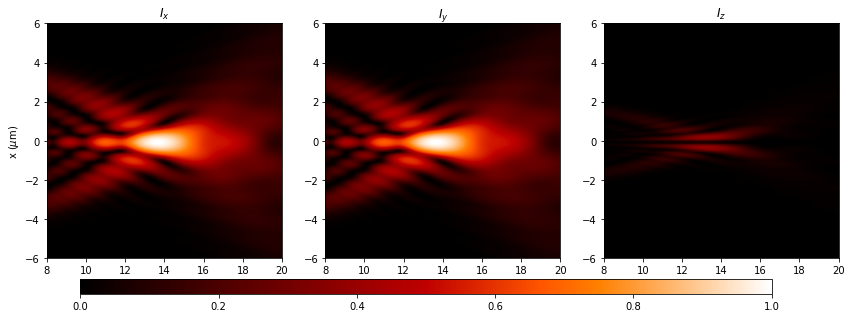

In [17]:
EM2.draw("intensities", logarithm=1e-1)

## to XY_field


In [18]:
size_out = 4 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = np.linspace(-size_out / 2, size_out / 2, 512)
z = focal - 3 * um

In [19]:
%%time
EM2=EM1.VCZT(z, x_out, y_out)


CPU times: user 559 ms, sys: 114 ms, total: 672 ms
Wall time: 671 ms


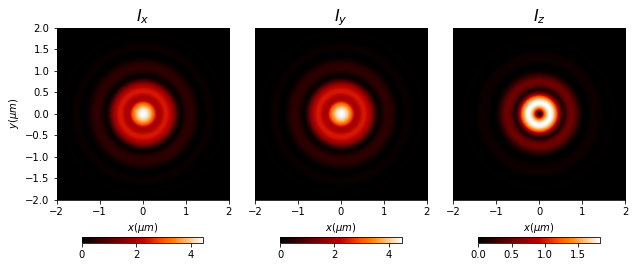

In [20]:
EM2.draw("intensities", logarithm=1e-1)

## to XYZ_field


In [21]:
size_out = 6 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 32)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)

In [22]:
%%time
EM3=EM1.VCZT(z, x_out, y_out)

CPU times: user 2.52 s, sys: 29.9 ms, total: 2.55 s
Wall time: 2.55 s


<Figure size 432x288 with 0 Axes>

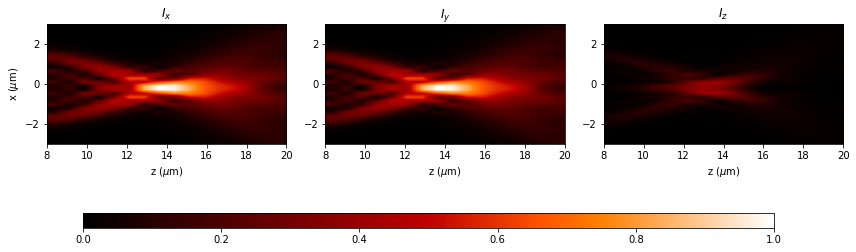

In [23]:
EM3.draw_XZ("intensities", y0=0, logarithm=1e-1)

<Figure size 432x288 with 0 Axes>

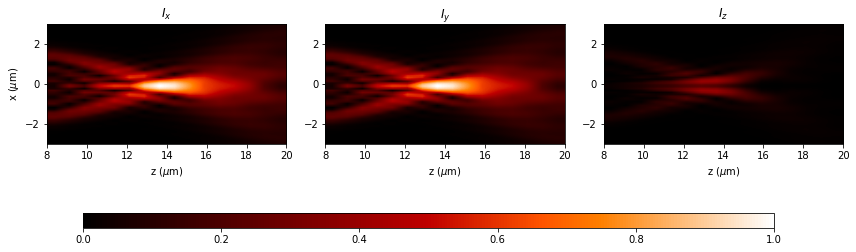

In [24]:
EM3.draw_YZ("intensities", x0=0, logarithm=1e-1)